# <span style="color:blue"> MBA em Ciência de Dados</span>
# <span style="color:blue">Técnicas Avançadas para Captura e Tratamento de Dados</span>

## <span style="color:blue">Análise de Componentes Principais -  Avaliação</span>
**Material Produzido por Luis Gustavo Nonato**<br>
**Cemeai - ICMC/USP São Carlos**
---

Os exercícios abaixo farão uso do conjunto de dados <font style="font-family: monaco">blobs2.csv</font> disponível no _moodle_.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import zscore


arquivos = pd.read_csv('blobs2.csv')

np.set_printoptions(suppress=True)

pca = PCA()
pca.fit(arquivos)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

<IPython.core.display.Javascript object>

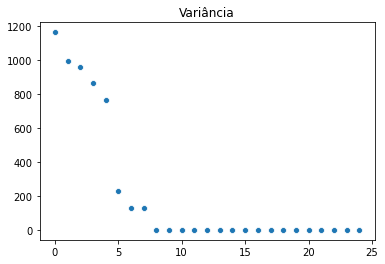

<IPython.core.display.Javascript object>

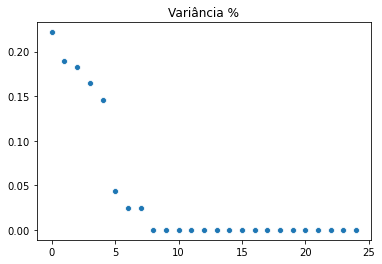

In [18]:
def my_plot(pca):
    """Plota a variância de um objeto pca com seaborn;
    Mostra dois plots, um com a variância total e outro com a porcentagem
    """
    sns.scatterplot(y=pca.explained_variance_, 
                    x=np.arange(len(pca.explained_variance_)))
    plt.title("Variância")
    plt.show()
    sns.scatterplot(y=pca.explained_variance_ratio_, 
                    x=np.arange(len(pca.explained_variance_ratio_)))
    plt.title("Variância %")
    plt.show()
my_plot(pca)

### Exercício 1)
Calcule as direções principais dos dados contidos no arquivo <font style="font-family: monaco">blobs2.csv</font>. Quais são os valores das duas maiores variâncias?

In [19]:
print(np.sort(pca.explained_variance_)[::-1])

[1162.75796919  993.6332352   958.55083238  862.61165292  761.97587147
  231.65873923  130.33674835  127.26867692    1.26850842    1.22231302
    1.20210845    1.10917185    1.08936336    1.06001534    1.00779968
    0.9783476     0.96666881    0.92778373    0.88499047    0.86990536
    0.84231443    0.78910242    0.76790196    0.71746359    0.68873522]


### Exercício 2)
Qual o número mínimo de direções principais necessárias para representar $90\%$ da informação contida nos dados?

Numero de componentes com no mínimo 90% da informacao:  5

Porcentagem da informacao:  0.9035960522494769


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

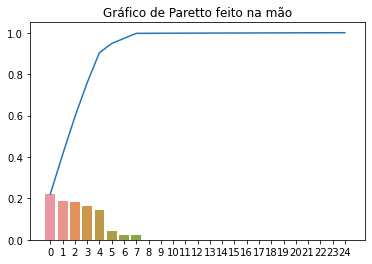

In [20]:
# OPÇÃO 1
percentage_info = 0.0
for component_idx, component in enumerate(pca.explained_variance_ratio_, 1):
    percentage_info += component
    if percentage_info >= 0.9:
        break
print('Numero de componentes com no mínimo 90% da informacao: ',
     component_idx)
print('\nPorcentagem da informacao: ', percentage_info)

# OPÇÃO 2
soma_acumulativa = np.cumsum(pca.explained_variance_ratio_)
np.argmax(soma_acumulativa >= 0.9) + 1

#OPÇÃO 3
def paretto_plot(pca):
    soma_acumulativa = np.cumsum(pca.explained_variance_ratio_)
    variance_ratio = pca.explained_variance_ratio_
    sns.barplot(y=variance_ratio, x=np.arange(len(variance_ratio)))
    sns.lineplot(y=soma_acumulativa, x=np.arange(len(variance_ratio)))
    plt.title("Gráfico de Paretto feito na mão")
    plt.show();

# Esse gráfico vai ficar mais bonito quando removermos os outliers...
paretto_plot(pca)

### Exercício 3)
Existem _outliers_ nos dados originais. Utilize z-score com um threshold de 2.8 para identificar os outliers e removê-los dos dados. Quantos outliers foram identificados?

In [23]:
# calculando z-scores
FileZScore = zscore(arquivos,axis=0)

# encontrando outliers
outliers = np.abs(FileZScore) > 2.8 # 2.8 é o threshold utilizado para 
                                    # identificar um valor como outlier
    
outliers_id = np.argwhere(outliers == True)
# print('indice das linhas dos elementos "outliers":\n',outliers_id)

# removendo outliers
df = pd.DataFrame(data=arquivos)
df.drop(outliers_id[:,0],axis=0, inplace=True)
arquivosWithoutOutliers = df.values

print('Total de Outliers removidos: ', arquivos.shape[0] - arquivosWithoutOutliers.shape[0])

Total de Outliers removidos:  5


### Exercício 4)
Qual a procentagem de informação representada pelas 4 primeiras componentes principais após a remoção dos outliers?

In [24]:
pca_no_outliers = PCA().fit(arquivosWithoutOutliers)
np.cumsum(pca_no_outliers.explained_variance_ratio_)[3] 

0.971338489674554

### Exercício 5)
Projete os dados sem outliers nas duas primeiras direções principais. Quantos clusters você consegue visualizar na projeção?

<IPython.core.display.Javascript object>

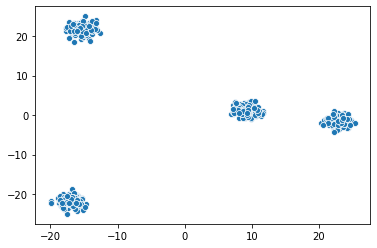

In [26]:
Proj_pca_no_outliers = pca_no_outliers.transform(arquivosWithoutOutliers)
sns.scatterplot(x=Proj_pca_no_outliers[:, 0], y=Proj_pca_no_outliers[:, 1])